In [1]:
# %matplotlib nbagg

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from bokeh.plotting import figure, show, output_notebook

Get the data.

In [2]:
feats = pd.read_csv("../System/sanity_train.csv")

af = feats.loc[feats['class'] == 1]
naf = feats.loc[feats['class'] == 0]

feats.head()

,superlatives,degree_adverbs,comparative_adverbs,proper_nouns,dates,numbers,fp_pronouns,negations,pos_emotion,neg_emotion,...,ap_num,ap_date,ap_title,alliteration,profanity,lexical_diversity,lexical_density,function_words,spelling_errors,class
0,0.002488,0.200000,0.133333,0.224000,0.000000,0.012438,0.230769,0.000000,0.009950,0.014925,...,0.0,1.0,1.0,0.000000,0.000000,0.613692,0.589242,0.410758,0.034230,1
1,0.000000,0.047619,0.047619,0.170940,0.000000,0.000000,0.545455,0.010471,0.002618,0.005236,...,0.0,1.0,1.0,0.166667,0.002577,0.590206,0.597938,0.402062,0.030928,1
2,0.004255,0.111111,0.000000,0.163934,0.017021,0.008511,0.125000,0.017021,0.017021,0.004255,...,0.0,1.0,1.0,0.000000,0.000000,0.566667,0.575000,0.425000,0.020833,1
3,0.000000,0.083333,0.000000,0.266667,0.000000,0.037037,0.000000,0.005291,0.015873,0.000000,...,1.0,1.0,0.0,0.666667,0.000000,0.708333,0.604167,0.395833,0.130208,1
4,0.002066,0.000000,0.000000,0.152866,0.004132,0.035124,0.555556,0.002066,0.004132,0.006198,...,1.0,1.0,1.0,0.000000,0.000000,0.529532,0.610998,0.389002,0.054990,1


Now we're going to try and look for some correlations.

In [3]:
output_notebook()

p = figure()

p.scatter(x=af['dates'], y=af['proper_nouns'], marker="circle",
            line_color="white", fill_color="red", fill_alpha=0.5, size=6)

p.scatter(x=naf['dates'], y=naf['proper_nouns'], marker="square",
            line_color="white", fill_color="blue", fill_alpha=0.5, size=6)
show(p)

Loading BokehJS ...

Now we can look at some correlations in pandas.

In [4]:
#pearson correlation.
pearson = feats.corr()

# kendall tau correlation
kendall = feats.corr('kendall')

# spearman rank correlation
spearman = feats.corr('spearman')

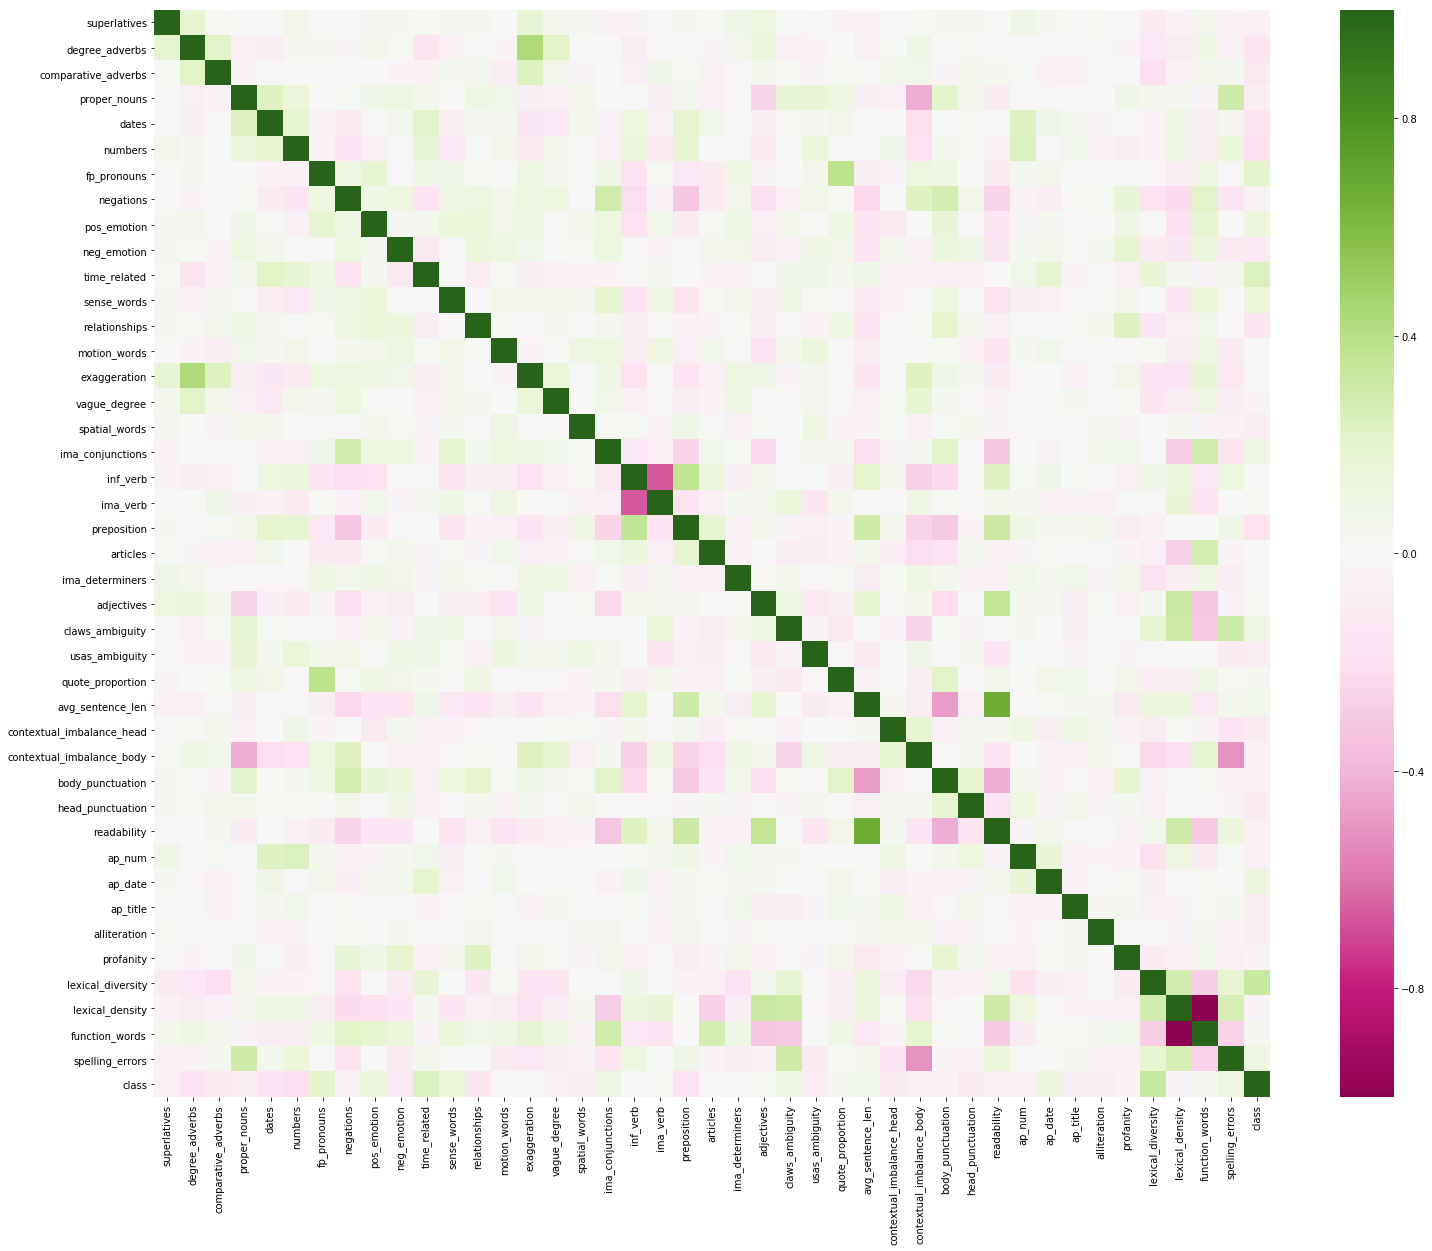

In [6]:
fig, ax = plt.subplots(figsize=(25,20))

sns.heatmap(spearman
           ,xticklabels=spearman.columns
           ,yticklabels=spearman.columns
           ,cmap="PiYG"
           ,ax=ax)
plt.show()